In [1]:
# Libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import RandomForestRegressor
from sklearn.utils           import resample

warnings.filterwarnings('ignore')

In [2]:
# local file paths

dir_name = 'selezione'
region_names = np.array(['A', 'B', 'C'])
region_ids   = np.array(['1286', '2061', '3101'])

fp_Xtrain = []
fp_Xval   = []
fp_Xtest  = []
fp_ytrain = []
fp_yval   = []
fp_ytest  = []

for i in range(3):
    fp_Xtrain.append(dir_name + f'/X_train{region_names[i]}.csv')
    fp_Xval  .append(dir_name + f'/X_val{  region_names[i]}.csv')
    fp_Xtest .append(dir_name + f'/X_test{ region_names[i]}.csv')
    fp_ytrain.append(dir_name + f'/y_train{region_names[i]}.csv')
    fp_yval  .append(dir_name + f'/y_val{  region_names[i]}.csv')
    fp_ytest .append(dir_name + f'/y_test{ region_names[i]}.csv')

In [3]:
# Lettura dei dati

X_train = []
X_val   = []
X_test  = []
y_train = []
y_val   = []
y_test  = []

for i in range(3):
    X_train.append(pd.read_csv(fp_Xtrain[i], low_memory=False))
    X_val  .append(pd.read_csv(fp_Xval  [i], low_memory=False))        
    X_test .append(pd.read_csv(fp_Xtest [i], low_memory=False))
    y_train.append(pd.read_csv(fp_ytrain[i], low_memory=False))
    y_val  .append(pd.read_csv(fp_yval  [i], low_memory=False))        
    y_test .append(pd.read_csv(fp_ytest [i], low_memory=False))
    
X_train = np.array(X_train, dtype=object)
X_val   = np.array(X_val,   dtype=object)
X_test  = np.array(X_test,  dtype=object)
y_train = np.array(y_train, dtype=object)
y_val   = np.array(y_val,   dtype=object)
y_test  = np.array(y_test,  dtype=object)

In [4]:
def dimensionality(y=False):
    for i in range(3):
        print(f'X_train{region_names[i]}: {X_train[i].shape}')
        print(f'X_val{region_names[i]}:   {X_val  [i].shape}')
        print(f'X_test{region_names[i]}:  {X_test [i].shape}')
        if y:
            print(f'y_train{region_names[i]}: {y_train[i].shape}')
            print(f'y_val{region_names[i]}:   {y_val  [i].shape}')
            print(f'y_test{region_names[i]}:  {y_test [i].shape}')
            print()

In [5]:
dimensionality(y=True)

X_trainA: (26819, 41)
X_valA:   (9006, 41)
X_testA:  (9085, 41)
y_trainA: (26819, 1)
y_valA:   (9006, 1)
y_testA:  (9085, 1)

X_trainB: (8119, 34)
X_valB:   (2658, 34)
X_testB:  (2606, 34)
y_trainB: (8119, 1)
y_valB:   (2658, 1)
y_testB:  (2606, 1)

X_trainC: (64771, 48)
X_valC:   (21908, 48)
X_testC:  (21876, 48)
y_trainC: (64771, 1)
y_valC:   (21908, 1)
y_testC:  (21876, 1)



In [6]:
# Globals
PERC_C  = 2/5
INDEX_C = 2

#SUB_PERC = [1/1000, 1/100, 1/1000] # circa 100, per testing, 2 minuti
SUB_PERC = [   1/3,     1,    1/3] # circa 8000, mezz'ora
#SUB_PERC = [     1,     1,      1] # dataset completo, quattro ore

RF_START = 20
RF_END   = 1000
RF_STEP  = 20

Per limiti tecnici di memoria, la gestione del dataset C risulta complicata e incorre spesso in errori a run-time di cateoria __MemoryError__

Le macchine su cui sono eseguiti i notebook supportano operazioni su circa 30000 righe, quindi uso i 2/5 del dataset originale per la Regione C

In [7]:
perc = PERC_C
ind  = INDEX_C
for X, y in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    X[ind], y[ind] = resample(
        X[ind], y[ind],
        n_samples = int(perc * len(X[2]))
    )

In [8]:
dimensionality(y=True)

X_trainA: (26819, 41)
X_valA:   (9006, 41)
X_testA:  (9085, 41)
y_trainA: (26819, 1)
y_valA:   (9006, 1)
y_testA:  (9085, 1)

X_trainB: (8119, 34)
X_valB:   (2658, 34)
X_testB:  (2606, 34)
y_trainB: (8119, 1)
y_valB:   (2658, 1)
y_testB:  (2606, 1)

X_trainC: (25908, 48)
X_valC:   (8763, 48)
X_testC:  (8750, 48)
y_trainC: (25908, 1)
y_valC:   (8763, 1)
y_testC:  (8750, 1)



# Subset di testing

In [9]:
sub_perc = SUB_PERC

In [10]:
for i in range(3):
    print(int(len(X_train[i])*sub_perc[i]))
    print(int(len(X_val  [i])*sub_perc[i]))
    print()

X_train_sub = []
y_train_sub = []
X_val_sub = []
y_val_sub = []

for i in range(3):
    Xt_sub, yt_sub = resample(X_train[i], y_train[i], n_samples = int(sub_perc[i]*len(X_train[i])))
    Xv_sub, yv_sub = resample(X_val  [i], y_val  [i], n_samples = int(sub_perc[i]*len(X_val[i])))
    X_train_sub.append(Xt_sub)
    y_train_sub.append(yt_sub)
    X_val_sub  .append(Xv_sub)
    y_val_sub  .append(yv_sub)

8939
3002

8119
2658

8636
2921



In [11]:
def dimensionality_sub(y=False):
    for i in range(3):
        print(f'X_train_sub{region_names[i]}: {X_train_sub[i].shape}')
        print(f'X_val_sub{region_names[i]}:   {X_val_sub  [i].shape}')
        if y:
            print(f'y_train_sub{region_names[i]}: {y_train_sub[i].shape}')
            print(f'y_val_sub{region_names[i]}:   {y_val_sub  [i].shape}')
        print()

In [12]:
dimensionality_sub(y=True)

X_train_subA: (8939, 41)
X_val_subA:   (3002, 41)
y_train_subA: (8939, 1)
y_val_subA:   (3002, 1)

X_train_subB: (8119, 34)
X_val_subB:   (2658, 34)
y_train_subB: (8119, 1)
y_val_subB:   (2658, 1)

X_train_subC: (8636, 48)
X_val_subC:   (2921, 48)
y_train_subC: (8636, 1)
y_val_subC:   (2921, 1)



# Costruzione RandomForestRegressor #

In [13]:
plt.rcParams.update({'font.size': 35})

In [14]:
def get_bias_var_mse(X, y, model):
        y_pred = model.predict(X)
        return {
            'bias': ((y - np.mean(y_pred))**2).mean(),\
            'var':  np.var(y_pred).mean(),\
            'mse':  ((y_pred - y.reshape(-1,1))**2).mean()
        }

In [15]:
# Costruzione RandomForestRegressor
def RandomForestRegressor_validation(X_train, y_train, X_val, y_val, verbose=False, debug=False, file_name = ''):
    
    def get_rf_reg(estimator):
        dt = RandomForestRegressor(
            n_estimators=estimator,
            # criterion = 'squared_error',
            n_jobs=-1
        )
        dt.fit(X_train, y_train)
        return dt
    
    def bias_var_mse(X, y, model):
        stats = get_bias_var_mse(X, y, model)
        return stats['bias'],\
               stats['var'],\
               stats['mse']
    
    def plot_mse(stats, name):
    
        print (f'{name}: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA')
        print()
    
        for n in ['mse', 'bias', 'var']:
        
            min_  = min(stats[n])
            best  = (np.argmin(stats[n]) * STEP) + START
            
            print (f'Punteggio finale: {stats[n][-1]} ({END}) alberi')
            print (f'Best {n}: {min_}')
            print (f'Best number of Trees: {best}')
            print()

        fig, ax = plt.subplots(figsize=(len(stats['mse'])/2, 10))
        
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        
        ax.plot(range(START, END+1, STEP),  stats['mse' ], 'o-', label='MSE')
        ax.plot(range(START, END+1, STEP),  stats['bias'], 'o-', label='BIAS')
        ax.plot(range(START, END+1, STEP),  stats['var' ], 'o-', label='VARIANCE')
        
        ax.set_title(f"{name} MSE, BIAS, VARIANCE on different Forest Tree Number", fontsize=15)
        ax.set_xlabel("Number of Trees used", fontsize=15)
        ax.grid()
        ax.legend(prop={'size': 12})
        
        if file_name != '':
             fig.savefig('images/' + file_name + '_RandomForestRegressor' + name + '.jpg')
        
    y_train = y_train.values.ravel()
    y_val   = y_val  .values.ravel()

    START = RF_START
    END   = RF_END
    STEP  = RF_STEP
    
    first = True
    
    info = []
    
    train_stats  = {
        'bias' : [],
        'var'  : [],
        'mse'  : []
    }
    
    val_stats    = {
        'bias' : [],
        'var'  : [],
        'mse'  : []
    } 
    
    for estimator in range(START, END+1, STEP):
        
        if debug:
            print(f'{estimator}/{END}')
    
        model = get_rf_reg(estimator)
        
        trn_bias, trn_var, trn_mse = bias_var_mse(X_train, y_train, model)
        val_bias, val_var, val_mse = bias_var_mse(  X_val,   y_val, model)

        train_stats['bias'].append(trn_bias)
        train_stats['var' ].append(trn_var )
        train_stats['mse' ].append(trn_mse )
        
        val_stats['bias'].append(val_bias)
        val_stats['var' ].append(val_var )
        val_stats['mse' ].append(val_mse )
        
        info.append(f'Estimators: {estimator}' +\
                    f'\n(Train MSE:       {trn_mse }  - Val MSE:      {val_mse })' +\
                    f'\n(Train Bias:      {trn_bias}  - Val Bias:     {val_bias})' +\
                    f'\n(Train Variance:  {trn_var }  - Val Variance: {val_var })' )

        if(first or val_mse < best_mse):
            first = False
            best_mse       = val_mse
            best_estimator = estimator
            best_model     = model
    
    if verbose:
        print()
        print("MSE, BIAS, VARIANCE Train e Validation")
        print(*info, sep='\n')
        print()
        
    plot_mse(train_stats, "Train"     )
    plot_mse(  val_stats, "Validation")
                
    return best_model

In [16]:
def get_rf(index, verbose=False, debug=False, file_name=''):
    if file_name == '':
        file_name = region_ids[index]
    return RandomForestRegressor_validation(
        X_train_sub[index],
        y_train_sub[index],
        X_val_sub  [index],
        y_val_sub  [index],
        verbose   = verbose,
        debug     = debug,
        file_name = file_name
    )

In [17]:
rf_model = []

Train: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA

Punteggio finale: 0.010027837688066463 (1000) alberi
Best mse: 0.010000389444227998
Best number of Trees: 360

Punteggio finale: 0.006551761911282602 (1000) alberi
Best bias: 0.006551683023459734
Best number of Trees: 360

Punteggio finale: 0.0034760757767838767 (1000) alberi
Best var: 0.003448706420768296
Best number of Trees: 360

Validation: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA

Punteggio finale: 0.028906294080518456 (1000) alberi
Best mse: 0.02889678359374127
Best number of Trees: 460

Punteggio finale: 0.028380084238308213 (1000) alberi
Best bias: 0.028379908310628903
Best number of Trees: 380

Punteggio finale: 0.0005262098422102196 (1000) alberi
Best var: 0.00051668276439824
Best number of Trees: 460

Wall time: 20min 42s


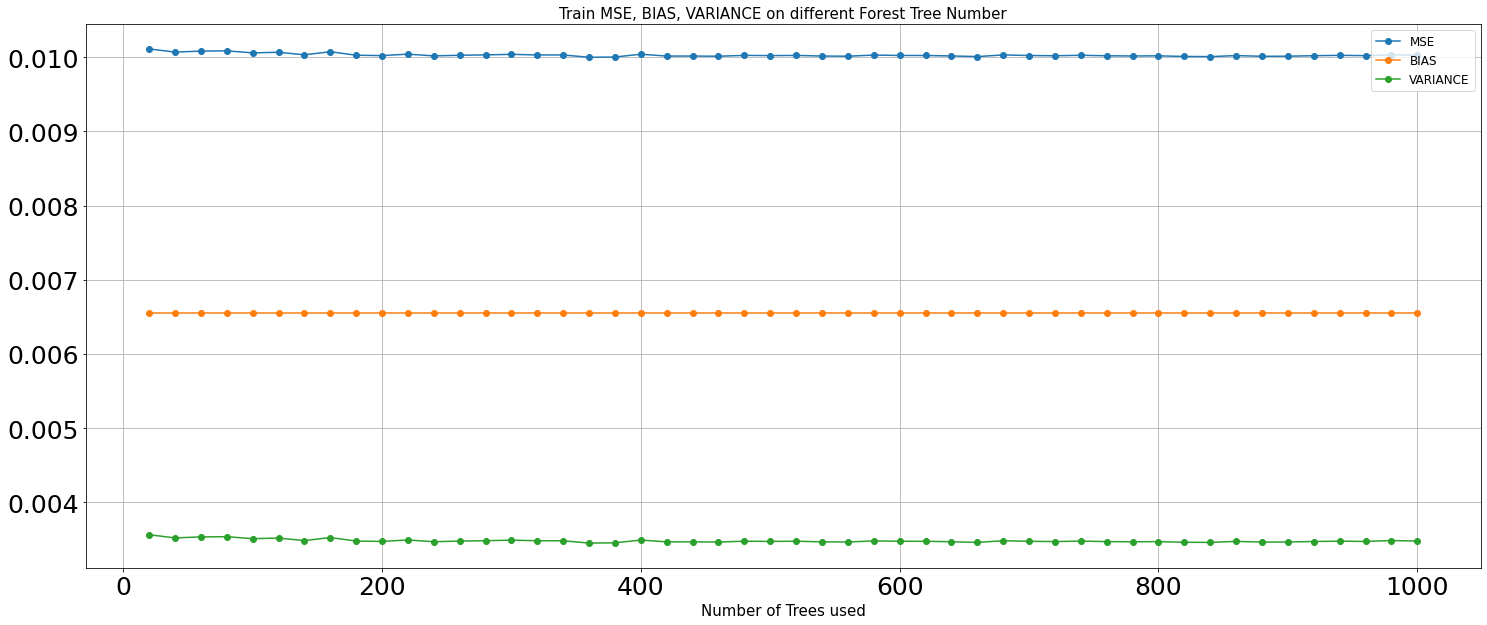

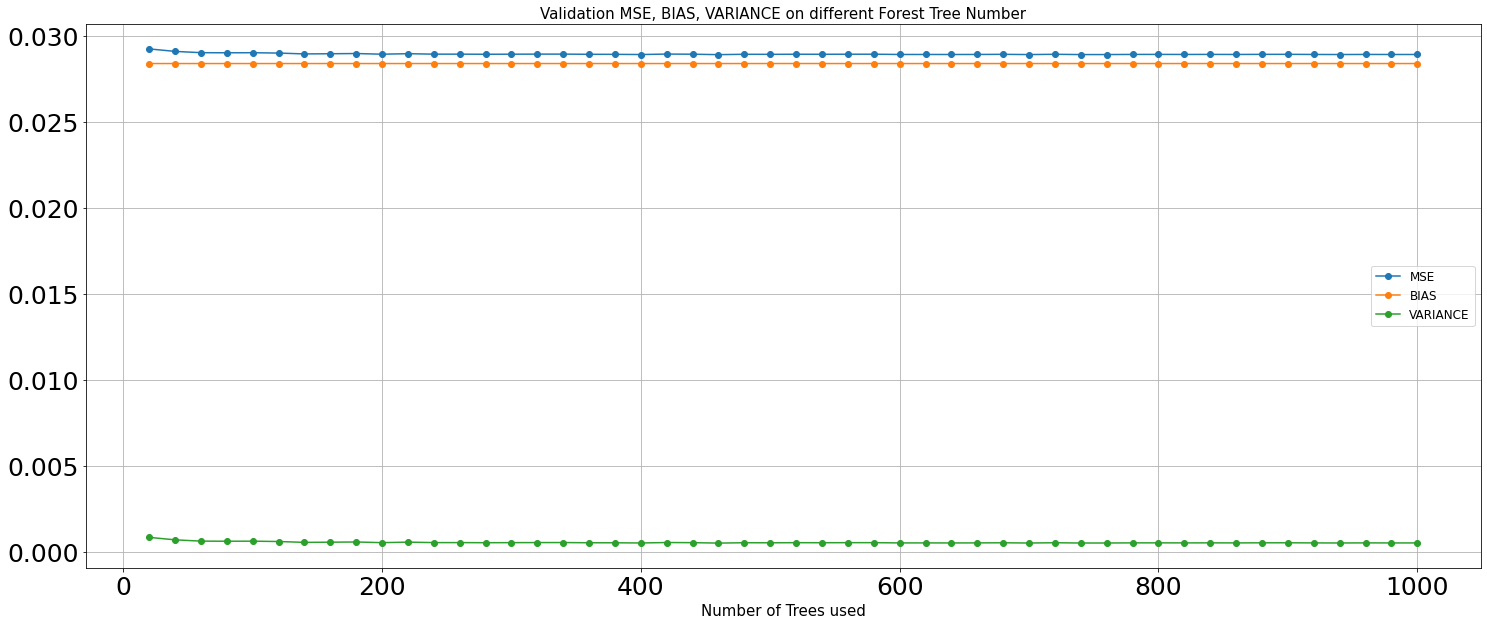

In [18]:
%%time
rf_model.append(
    get_rf(
        0,
        verbose = False,
        debug   = False#,
        #file_name = 'Prova1'
    )
)

Train: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA

Punteggio finale: 0.012758175337978517 (1000) alberi
Best mse: 0.012726161337311552
Best number of Trees: 540

Punteggio finale: 0.007557915126214492 (1000) alberi
Best bias: 0.007557800951799354
Best number of Trees: 60

Punteggio finale: 0.005200260211764 (1000) alberi
Best var: 0.005168294092709406
Best number of Trees: 540

Validation: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA

Punteggio finale: 0.02233592420684605 (1000) alberi
Best mse: 0.02228009445570265
Best number of Trees: 560

Punteggio finale: 0.021369698215854643 (1000) alberi
Best bias: 0.02136928595942343
Best number of Trees: 100

Punteggio finale: 0.0009662259909914066 (1000) alberi
Best var: 0.0009081830386729305
Best number of Trees: 560

Wall time: 15min 49s


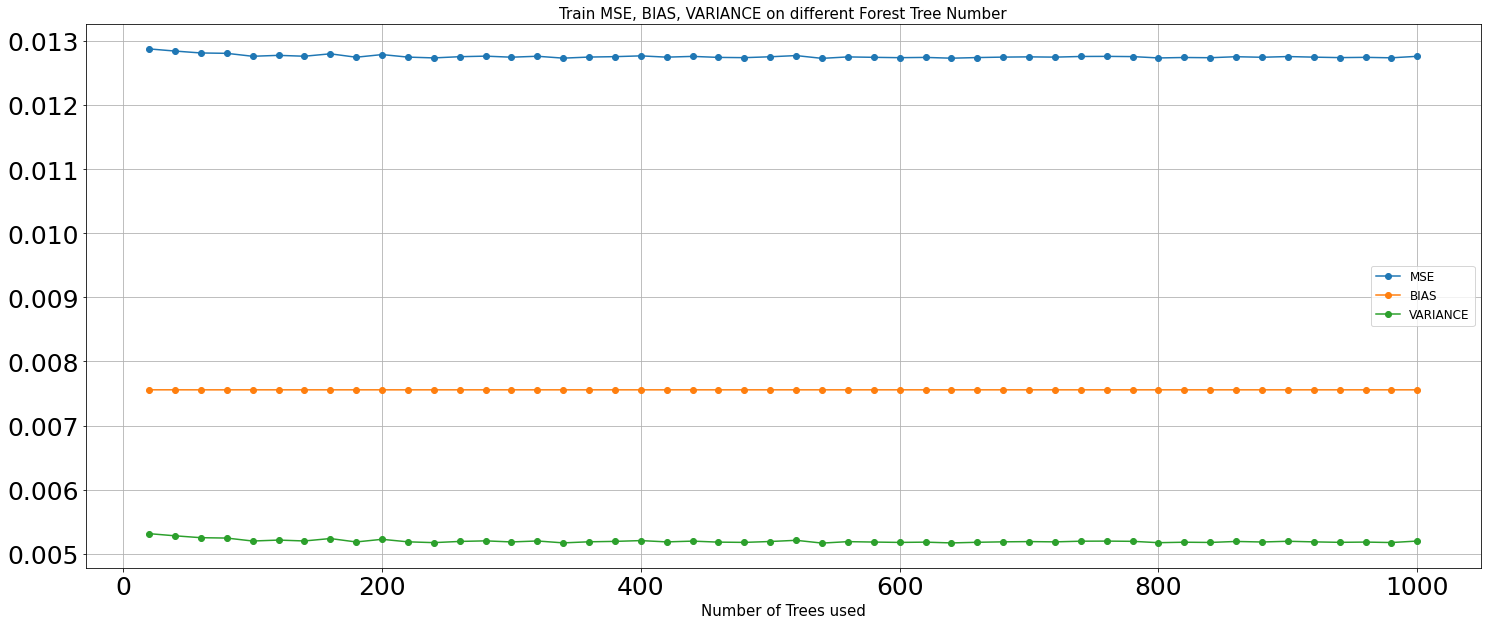

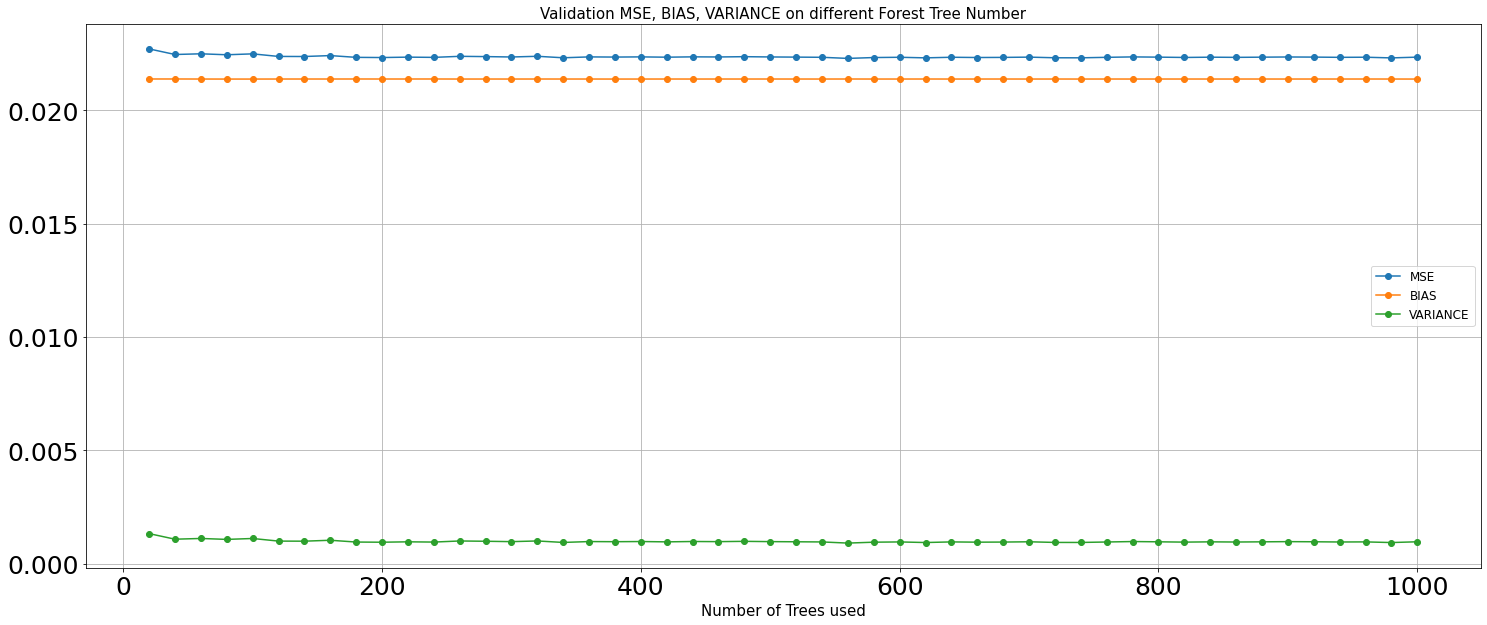

In [19]:
%%time
rf_model.append(
    get_rf(
        1,
        verbose = False,
        debug   = False#,
        #file_name = 'Prova2'
    )
)

Train: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA

Punteggio finale: 0.017746461055336997 (1000) alberi
Best mse: 0.017719280588293848
Best number of Trees: 620

Punteggio finale: 0.011349046959766539 (1000) alberi
Best bias: 0.011348862956698173
Best number of Trees: 220

Punteggio finale: 0.0063974140955704376 (1000) alberi
Best var: 0.006370331592750899
Best number of Trees: 620

Validation: TUNING DEL MASSIMO NUMERO DI ALBERI NELLA FORESTA

Punteggio finale: 0.028300478316752385 (1000) alberi
Best mse: 0.028272655122508917
Best number of Trees: 620

Punteggio finale: 0.027380112186279264 (1000) alberi
Best bias: 0.027375131962975117
Best number of Trees: 220

Punteggio finale: 0.0009203661304731199 (1000) alberi
Best var: 0.0008948684195167124
Best number of Trees: 620

Wall time: 21min 28s


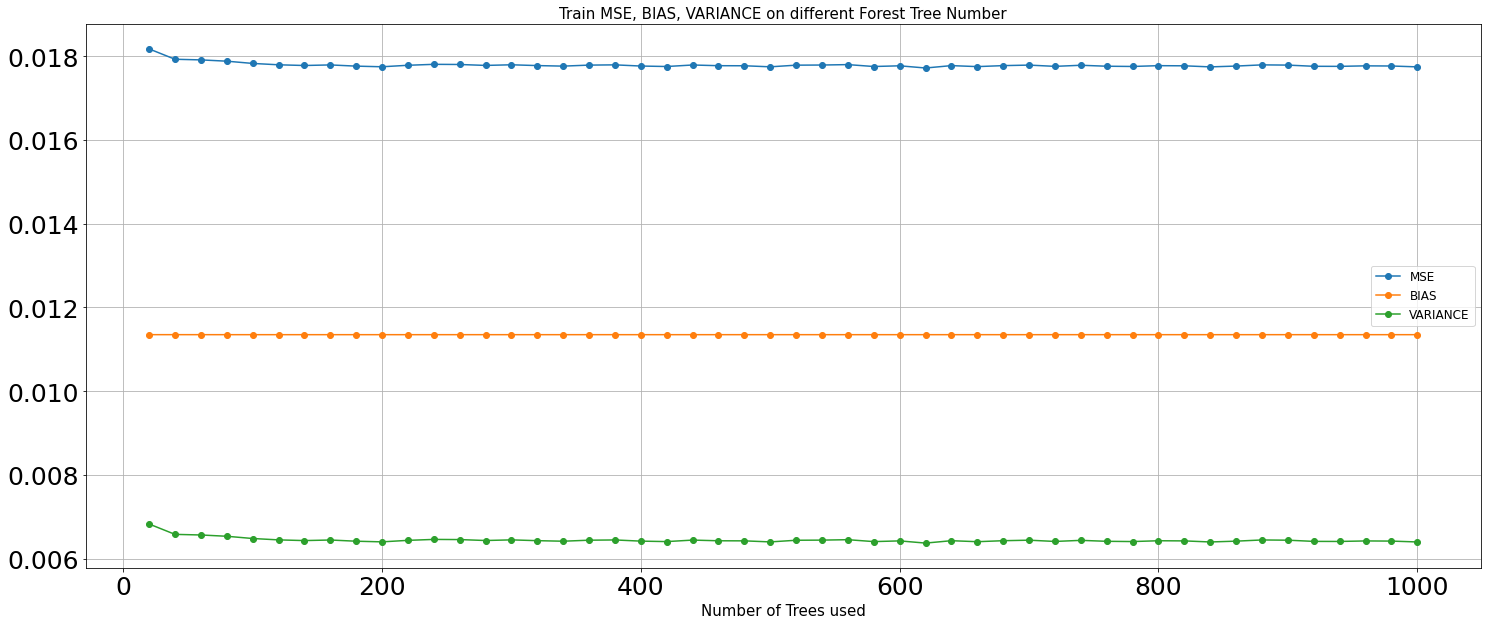

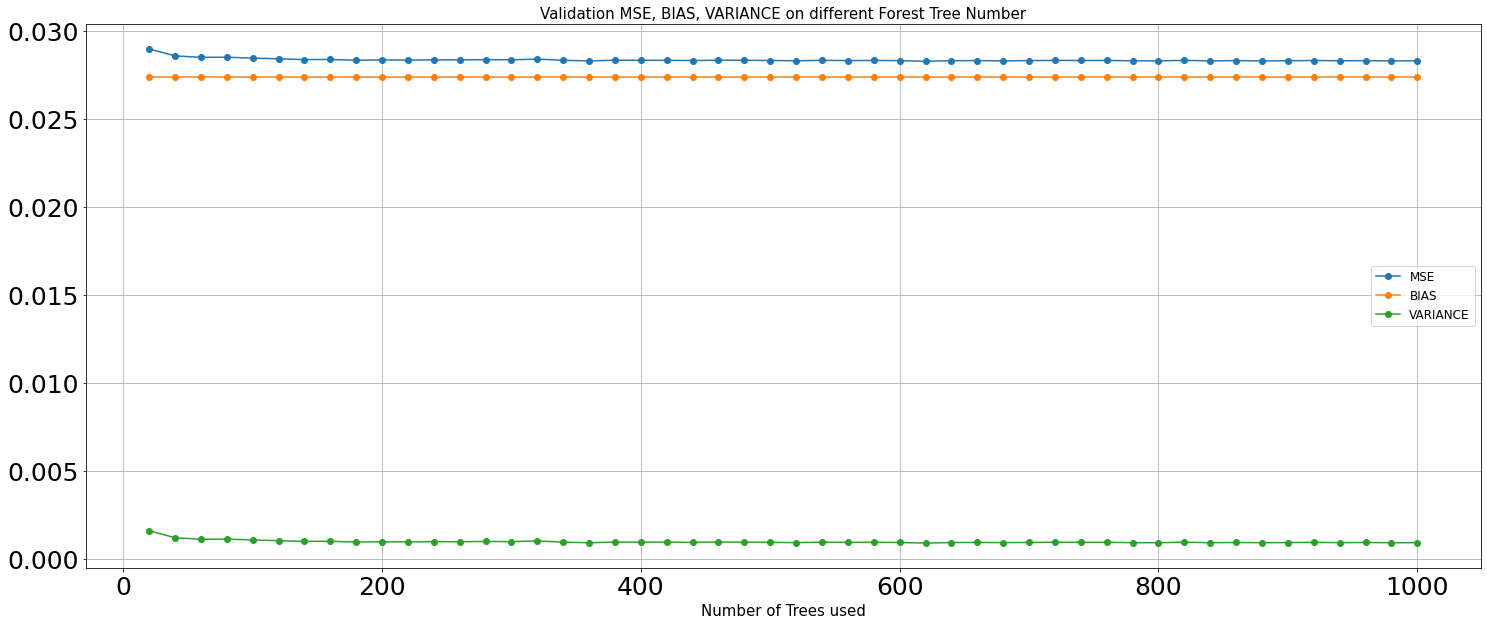

In [20]:
%%time
rf_model.append(
    get_rf(
        2,
        verbose = False,
        debug   = False#,
        #file_name = 'Prova3'
    )
)

In [21]:
rf_model

[RandomForestRegressor(n_estimators=460, n_jobs=-1),
 RandomForestRegressor(n_estimators=560, n_jobs=-1),
 RandomForestRegressor(n_estimators=620, n_jobs=-1)]

In [22]:
def print_stats(X, y, models):
    for i in range(3):
        print(f'{region_names[i]}: {get_bias_var_mse(X[i], y[i].values.ravel(), models[i])}')
        print()

In [23]:
def print_all_stats(models):
    for X, y, name in zip(
        [X_train,        X_val, X_test],
        [y_train,        y_val, y_test],
        ['Train', 'Validation', 'Test']
    ):
        print(name)
        print()
        print_stats(X, y, models)
        print()
        

In [24]:
print_all_stats(rf_model)

Train

A: {'bias': 0.006933734541760769, 'var': 0.0013050718752980449, 'mse': 0.008238806417058877}

B: {'bias': 0.007534930203979084, 'var': 0.0031690186817523304, 'mse': 0.010703948885731375}

C: {'bias': 0.011430113306150621, 'var': 0.002595821156075766, 'mse': 0.014025934462226405}


Validation

A: {'bias': 0.027265877944066413, 'var': 0.0005903582952454505, 'mse': 0.02785623623931189}

B: {'bias': 0.019595344059531318, 'var': 0.0009687399893581876, 'mse': 0.020564084048889486}

C: {'bias': 0.025842315480485524, 'var': 0.0009540094268568057, 'mse': 0.02679632490734228}


Test

A: {'bias': 0.02862140213973523, 'var': 0.0004956982292830009, 'mse': 0.029117100369018076}

B: {'bias': 0.02409973290928445, 'var': 0.0009393535211303973, 'mse': 0.02503908643041484}

C: {'bias': 0.029419843969068507, 'var': 0.0008241320643606956, 'mse': 0.03024397603342929}




In [25]:
def feature_importance(X, rf, reg_name, file_name=''):
    
    print(f'{reg_name} FEATURE IMPORTANCES')
    print(list(X.columns[np.argsort(rf.feature_importances_)[::-1]]))
    print()
    
    fig, ax = plt.subplots(figsize=(len(rf.feature_importances_)/2,10))
    
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='x', which='minor', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=25)
    ax.tick_params(axis='y', which='minor', labelsize=30)
    
    ax.bar(range(0, X.shape[1]), rf.feature_importances_)
    ax.set_title(f'Feature Importances {reg_name}')
    ax.set_xticks(range(X.shape[1]))
    ax.set_xticklabels(X.columns, rotation=90)
    
    ax.grid()
    
    if file_name != '':
        fig.savefig('images/' + file_name + '_RandomForestRegressor_FeatureImportance.jpg')

In [26]:
def get_feature_importance(index, file_name=''):
    if file_name == '':
        file_name = region_ids[i]
    feature_importance(
        X_train[i],
        rf_model[i],
        region_names[i],
        file_name = file_name
    )

C FEATURE IMPORTANCES
['living_area_prop', 'structuretaxvaluedollarcnt', 'tax_ratio', 'neighborhood_mean_price', 'lotsizesquarefeet', 'tax_prop', 'int_transactiondate', 'longitude', 'yearbuilt', 'latitude', 'taxamount', 'landtaxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'regionidzip', 'finishedsquarefeet12', 'period_mean_price', 'rawcensustractandblock', 'regionidcity', 'buildingqualitytypeid', 'bedroomcnt', 'bathroomcnt', 'calculatedbathnbr', 'propertyzoningdesc_LARD1.5', 'propertyzoningdesc_LAR1', 'unitcnt', 'propertylandusetypeid_246.0', 'heatingorsystemtypeid_7.0', 'poolcnt_1.0', 'buildingqualitytypeid_na_flag', 'assessmentyear', 'heatingorsystemtypeid_2.0', 'propertycountylandusecode_0101', 'propertycountylandusecode_0100', 'propertyzoningdesc_rare', 'propertycountylandusecode_rare', 'propertyzoningdesc_LAR3', 'propertylandusetypeid_261.0', 'propertyzoningdesc_LBR1N', 'propertylandusetypeid_260.0', 'propertylandusetypeid_247.0', 'propertylandusetypeid_31

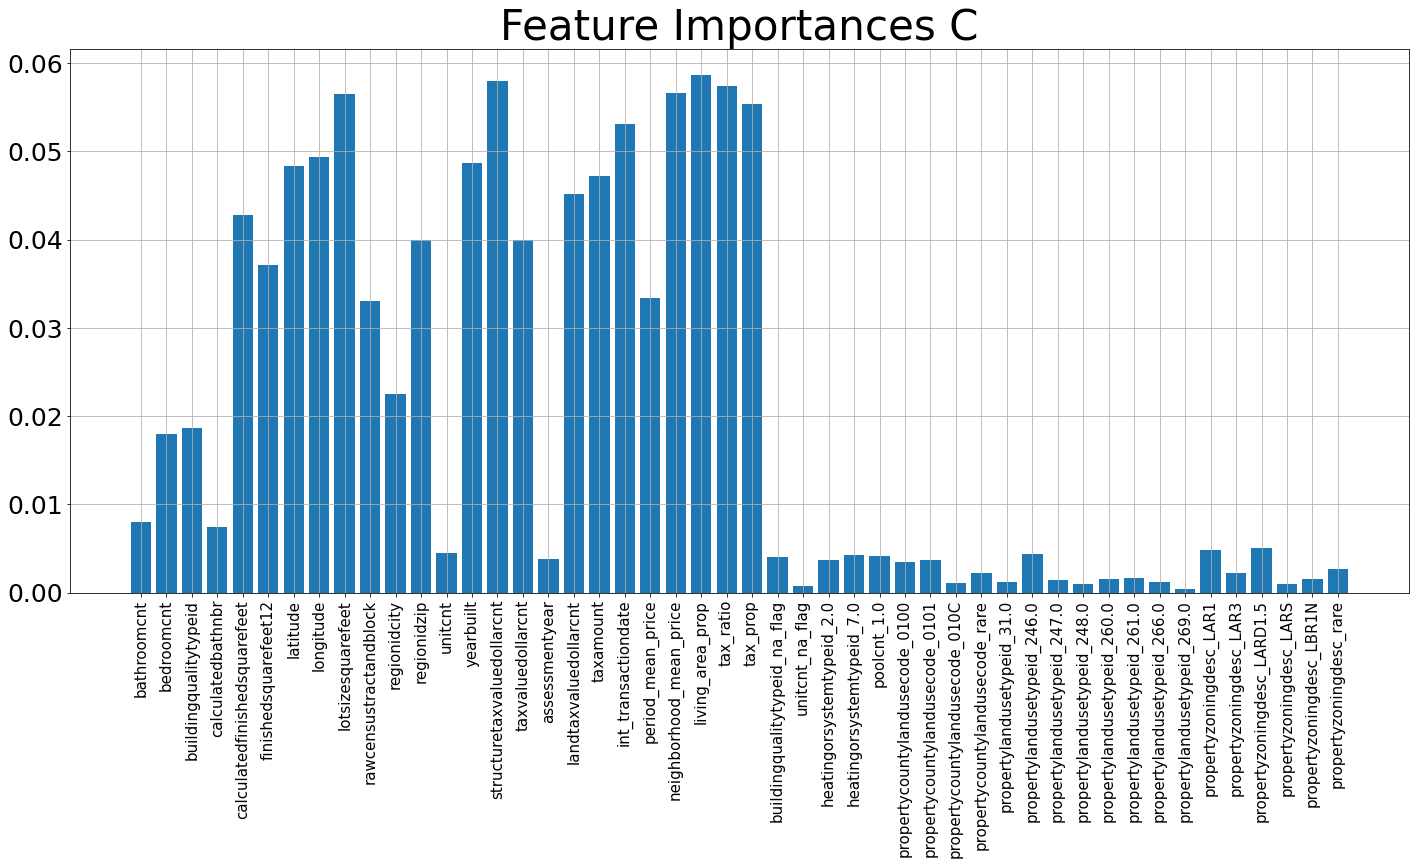

In [27]:
get_feature_importance(0)

C FEATURE IMPORTANCES
['living_area_prop', 'structuretaxvaluedollarcnt', 'tax_ratio', 'neighborhood_mean_price', 'lotsizesquarefeet', 'tax_prop', 'int_transactiondate', 'longitude', 'yearbuilt', 'latitude', 'taxamount', 'landtaxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'regionidzip', 'finishedsquarefeet12', 'period_mean_price', 'rawcensustractandblock', 'regionidcity', 'buildingqualitytypeid', 'bedroomcnt', 'bathroomcnt', 'calculatedbathnbr', 'propertyzoningdesc_LARD1.5', 'propertyzoningdesc_LAR1', 'unitcnt', 'propertylandusetypeid_246.0', 'heatingorsystemtypeid_7.0', 'poolcnt_1.0', 'buildingqualitytypeid_na_flag', 'assessmentyear', 'heatingorsystemtypeid_2.0', 'propertycountylandusecode_0101', 'propertycountylandusecode_0100', 'propertyzoningdesc_rare', 'propertycountylandusecode_rare', 'propertyzoningdesc_LAR3', 'propertylandusetypeid_261.0', 'propertyzoningdesc_LBR1N', 'propertylandusetypeid_260.0', 'propertylandusetypeid_247.0', 'propertylandusetypeid_31

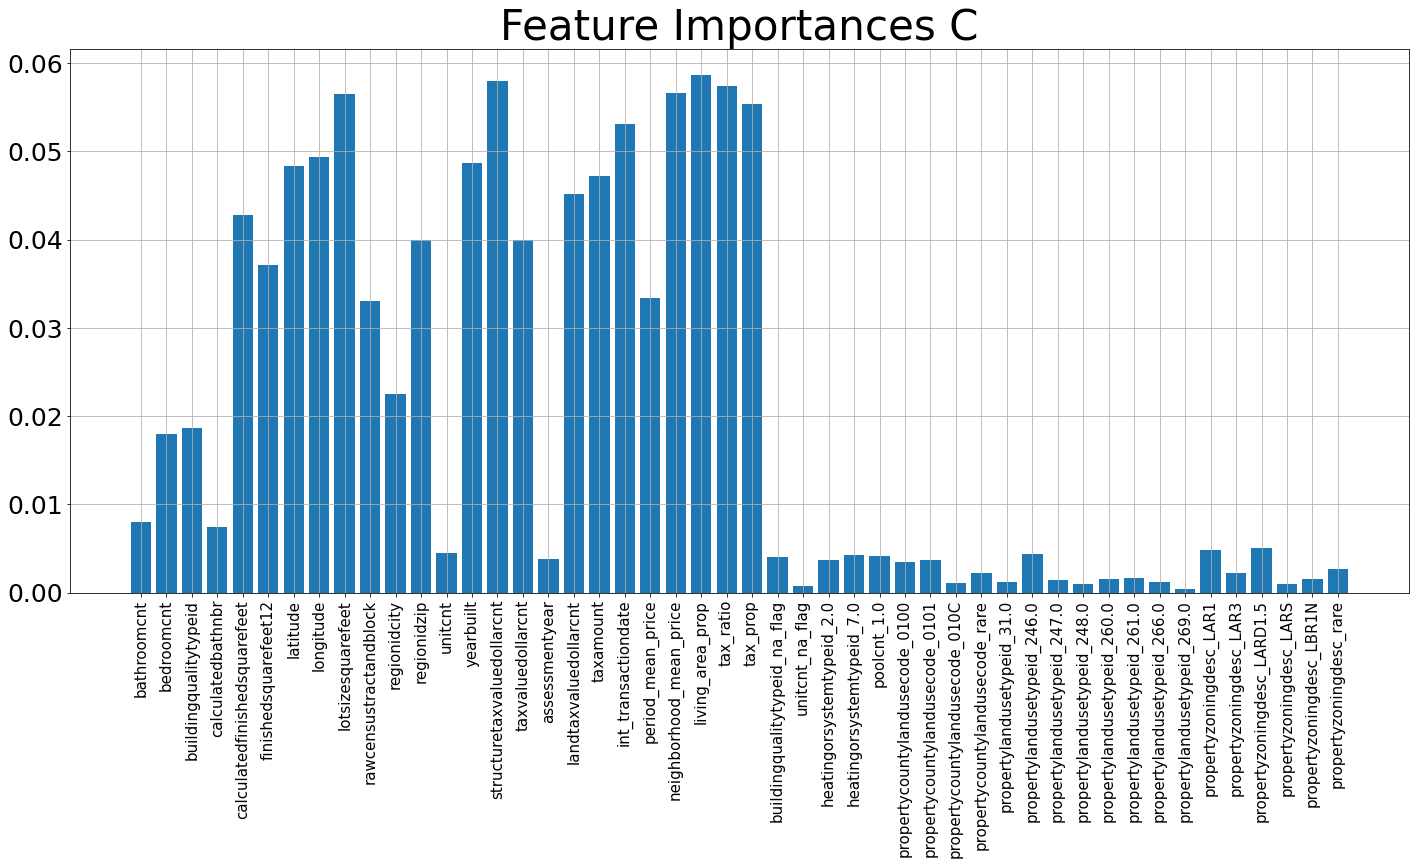

In [28]:
get_feature_importance(1)

C FEATURE IMPORTANCES
['living_area_prop', 'structuretaxvaluedollarcnt', 'tax_ratio', 'neighborhood_mean_price', 'lotsizesquarefeet', 'tax_prop', 'int_transactiondate', 'longitude', 'yearbuilt', 'latitude', 'taxamount', 'landtaxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'regionidzip', 'finishedsquarefeet12', 'period_mean_price', 'rawcensustractandblock', 'regionidcity', 'buildingqualitytypeid', 'bedroomcnt', 'bathroomcnt', 'calculatedbathnbr', 'propertyzoningdesc_LARD1.5', 'propertyzoningdesc_LAR1', 'unitcnt', 'propertylandusetypeid_246.0', 'heatingorsystemtypeid_7.0', 'poolcnt_1.0', 'buildingqualitytypeid_na_flag', 'assessmentyear', 'heatingorsystemtypeid_2.0', 'propertycountylandusecode_0101', 'propertycountylandusecode_0100', 'propertyzoningdesc_rare', 'propertycountylandusecode_rare', 'propertyzoningdesc_LAR3', 'propertylandusetypeid_261.0', 'propertyzoningdesc_LBR1N', 'propertylandusetypeid_260.0', 'propertylandusetypeid_247.0', 'propertylandusetypeid_31

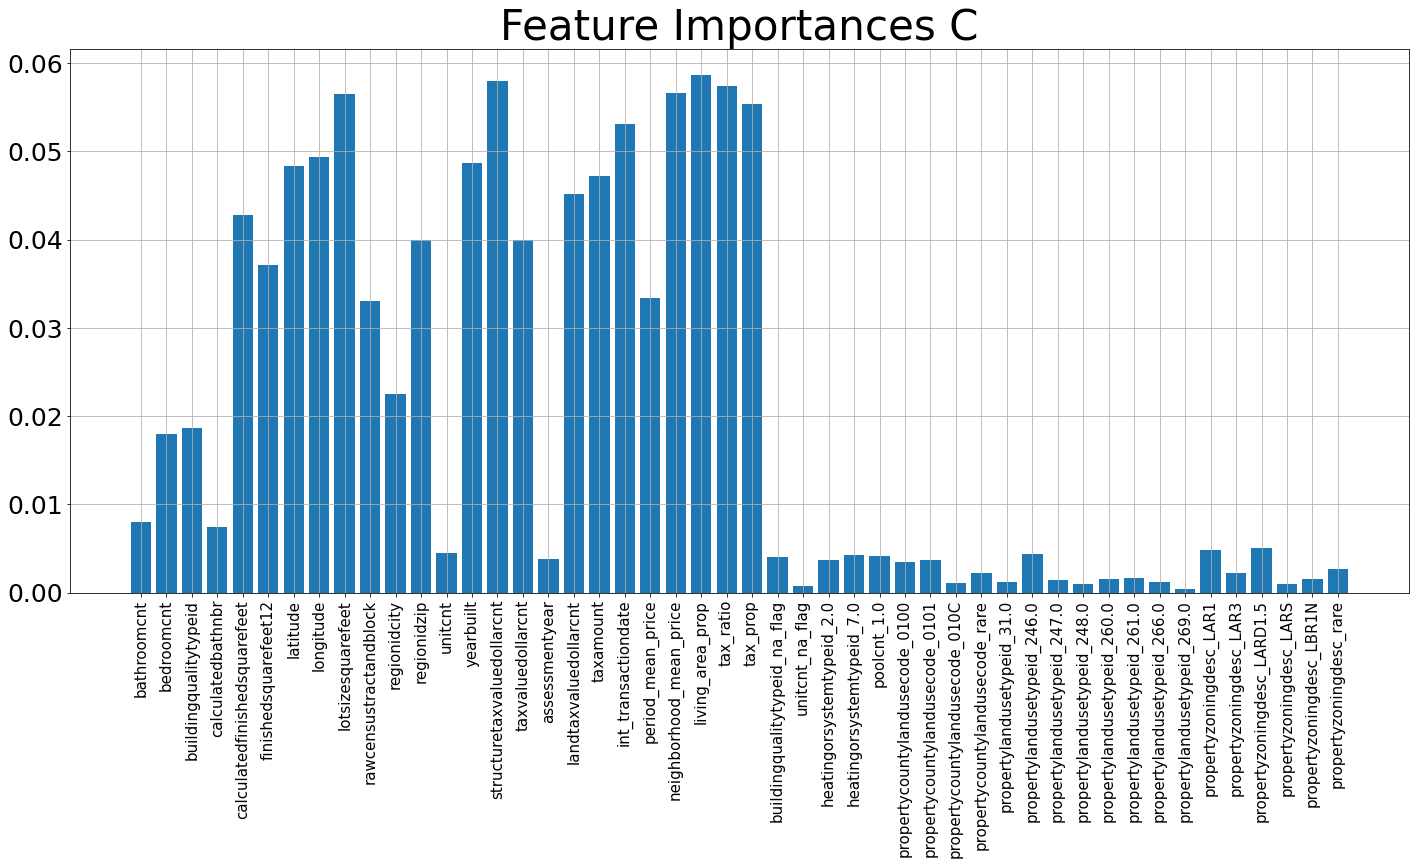

In [29]:
get_feature_importance(2)